In [1]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [2]:
# GPUs config
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus) # Looks like we have one GPU, nice!
# Config for GPU memory growth if needed
tf.config.experimental.set_memory_growth(gpus[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [3]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix

In [4]:
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

In [6]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[1, ...]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4., 5., 6.], dtype=float32)>

In [8]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [9]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @ tf.transpose(t) # matrix multiplication, same as tf.matmul()

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
tf.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [13]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

In [14]:
# Numpy-TF compatibility
import numpy as np
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [15]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [16]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [18]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [19]:
try:
    tf.constant(2.0) + tf.constant(40) # Can't add int to float
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [20]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64) # Can't add 32-bit to 64-bit
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


In [21]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [22]:
tf.constant(b"hello world") # b is bytes, tf uses byte strings by default, if we pass in a unicode string like "hello world", it gets 
# encoded to UTF-8-byte-string ==> b'hello world'

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [23]:
tf.constant("hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [24]:
tf.constant(b"café") # we can't cast the special e as one byte

SyntaxError: bytes can only contain ASCII literal characters. (<ipython-input-24-d47c47917fd2>, line 1)

In [25]:
tf.constant("café") # gets encoded to UTF-8-byte string

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [26]:
u = tf.constant([ord(ch) for ch in "café"]) # ord returns an integer representing the Unicode character
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [27]:
b = tf.strings.unicode_encode(u, "UTF-8") # encode to UTF-8-byte string
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [28]:
tf.strings.length(b, unit="UTF8_CHAR") # A UTF-8-byte string (or in general, a tf.string) is atomic, i.e., its length won't
# show in the tensor's shape

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [29]:
tf.strings.unicode_decode(b, "UTF-8") # After decoding to integer representation, the length will show

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [30]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"]) # Unicode to UTF-8
p

<tf.Tensor: shape=(4,), dtype=string, numpy=
array([b'Caf\xc3\xa9', b'Coffee', b'caff\xc3\xa8',
       b'\xe5\x92\x96\xe5\x95\xa1'], dtype=object)>

In [31]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [32]:
r = tf.strings.unicode_decode(p, "UTF8") # decoding gives integer representations of unicode chracters. UTF-8 to Unicode
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [33]:
print(r) #  it is a tensor with one or more ragged dimensions, meaning dimensions whose slices may have different lengths.

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


In [34]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [35]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [36]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [37]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [38]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [39]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

In [40]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [41]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [42]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [43]:
s2 = s * 2.0

In [44]:
try:
    s3 = s + 1
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'int'


In [45]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [46]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]], # Must be in reading order (left to right, up to down)
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [47]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [48]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [49]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2)) # Note the last two zeroes are padding

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [50]:
tf.sparse.to_dense(tf.sets.union(set1, set2), default_value=-1)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10, -1, -1]])>

In [51]:
tf.sparse.to_dense(tf.sets.difference(set1, set2), default_value=-1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 2,  3,  7],
       [ 7, -1, -1]])>

In [52]:
tf.sparse.to_dense(tf.sets.difference(set2, set1), default_value=-1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 4,  6],
       [10, -1]])>

In [53]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2), default_value=-1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 5, -1],
       [ 0,  9]])>

In [54]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [55]:
v.assign(2 * v) # Note that it's done in place

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [56]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [57]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [58]:
try:
    v[0, 1] = 43 # Must use assign
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [59]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [60]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

In [61]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

In [62]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.])) # Must assign back to array otherwise Eager mode would work but not Graph mode
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [63]:
array.read(1) # This will clear index 1 as demonstrated below

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [64]:
array.read(1)

InvalidArgumentError: Could not read index 1 twice because it was cleared after a previous read (perhaps try setting clear_after_read = false?)

In [ ]:
array.stack()

In [ ]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

In [65]:
variance

NameError: name 'variance' is not defined

In [66]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [67]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [68]:
tf.where([True, False, False, True], [1,2,3,4], [100,200,300,400]) # take second array's value when true, else take third array's value

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  1, 200, 300,   4])>

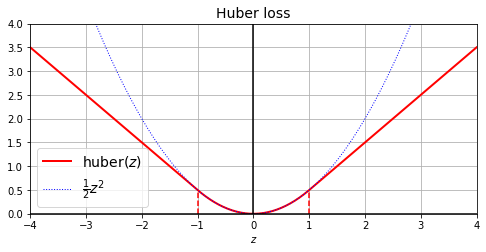

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "r-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k') # Makes axis darker
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()
# Note how when Huber is in abs(1) it starts curving

In [70]:
input_shape = X_train.shape[1:] # index 0 is the number of samples

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [71]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [72]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5441 - mae: 0.8968 - val_loss: 0.2384 - val_mae: 0.5272
Epoch 2/2
11610/11610 [==============================] - 0s 33us/sample - loss: 0.2084 - mae: 0.4982 - val_loss: 0.1875 - val_mae: 0.4741


In [73]:
model.save("models/my_model_with_a_custom_loss.h5")

In [74]:
model = keras.models.load_model("models/my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn}) # We need this for custom objects to map the function name to the actual function

In [75]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid)) # notice how it picks up where it left off and continues training

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 50us/sample - loss: 0.1979 - mae: 0.4857 - val_loss: 0.1838 - val_mae: 0.4613
Epoch 2/2
11610/11610 [==============================] - 0s 31us/sample - loss: 0.1942 - mae: 0.4801 - val_loss: 0.1993 - val_mae: 0.4816


In [76]:
def create_huber(threshold=1.0):
    def huber_fn1(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn1

In [77]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [78]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 60us/sample - loss: 0.2154 - mae: 0.4808 - val_loss: 0.2460 - val_mae: 0.4816
Epoch 2/2
11610/11610 [==============================] - 0s 32us/sample - loss: 0.2125 - mae: 0.4787 - val_loss: 0.2263 - val_mae: 0.4762


In [79]:
model.save("models/my_model_with_a_custom_loss_threshold_2.h5")

In [80]:
model = keras.models.load_model("models/my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn1": create_huber(2.0)}) # huber_fn1 is what we returned in the function

In [81]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 51us/sample - loss: 0.2103 - mae: 0.4753 - val_loss: 0.1933 - val_mae: 0.4538
Epoch 2/2
11610/11610 [==============================] - 0s 35us/sample - loss: 0.2073 - mae: 0.4710 - val_loss: 0.2504 - val_mae: 0.4928


In [82]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold} # ** unzips a dictionary

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [84]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [85]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 60us/sample - loss: 0.7297 - mae: 0.9225 - val_loss: 0.5269 - val_mae: 0.6453
Epoch 2/2
11610/11610 [==============================] - 0s 33us/sample - loss: 0.2439 - mae: 0.5107 - val_loss: 0.4294 - val_mae: 0.5866


In [86]:
model.save("models/my_model_with_a_custom_loss_class.h5")

In [87]:
model = keras.models.load_model("models/my_model_with_a_custom_loss_class.h5", # note how this time we need not provide the threshold 2 to Huberloss
                                custom_objects={"HuberLoss": HuberLoss})
# Future tf versions may fix this issue

ValueError: Unknown loss function: HuberLoss

In [88]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 0s 32us/sample - loss: 0.2322 - mae: 0.4985 - val_loss: 0.3470 - val_mae: 0.5358
Epoch 2/2
11610/11610 [==============================] - 0s 31us/sample - loss: 0.2248 - mae: 0.4909 - val_loss: 0.2942 - val_mae: 0.5096


In [89]:
model.loss.threshold

2.0

In [90]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1])) # variance = 2.0 / (fan-in +fan-out)
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights)) # 0.01 is lambda

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [91]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [93]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [94]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 62us/sample - loss: 1.6051 - mae: 0.8787 - val_loss: inf - val_mae: inf
Epoch 2/2
11610/11610 [==============================] - 0s 31us/sample - loss: 0.6192 - mae: 0.5241 - val_loss: inf - val_mae: inf


In [95]:
model.save("models/my_model_with_many_custom_parts.h5")

In [97]:
model = keras.models.load_model(
    "models/my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })
# Tensorflow 2.1.1 works!

In [98]:
class MyL1Regularizer(keras.regularizers.Regularizer): # We can do this if we want to be able to customize lambda
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [100]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [101]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 62us/sample - loss: 1.8752 - mae: 0.9863 - val_loss: 2.2402 - val_mae: 0.5707
Epoch 2/2
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5767 - mae: 0.5237 - val_loss: 1.5281 - val_mae: 0.5152


In [102]:
model.save("models/my_model_with_many_custom_parts.h5")

In [104]:
model = keras.models.load_model(
    "models/my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })
# Tensorflow 2.1.1 works!

In [105]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [106]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [107]:
model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 56us/sample - loss: 1.7564 - huber_fn1: 0.7326
Epoch 2/2
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5586 - huber_fn1: 0.2421


In [108]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [109]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

  ...
    to  
  ['...']
Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 72us/sample - loss: 0.1158 - huber_fn1: 0.2305
Epoch 2/2
11610/11610 [==============================] - 0s 28us/sample - loss: 0.1113 - huber_fn1: 0.2228


In [110]:
sample_weight.shape

(11610,)

In [111]:
X_train_scaled.shape

(11610, 8)

In [112]:
y_train.shape

(11610,)

In [113]:
history.history

{'loss': [0.115807869520863, 0.1112947969832983],
 'huber_fn1': [0.23049977, 0.22281739]}

In [114]:
history.history["loss"][0], history.history["huber_fn1"][0] * sample_weight.mean() # loss = metric * mean of sample weights (plus some floating point precision error)

# metric is the sum of the weighted instance losses divided by the sum of all weights, i.e., the weighted mean of all the instance losses
# loss is the sum of the weighted instance losses divided by the batch size

(0.115807869520863, 0.11565849124711532)

In [115]:
history.history

{'loss': [0.115807869520863, 0.1112947969832983],
 'huber_fn1': [0.23049977, 0.22281739]}

In [116]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1]) # True/Predict

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [117]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>]

In [118]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0]) # Note it's not 0.4

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [119]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [120]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [121]:
precision.reset_states() # reset both variables to 0

In [122]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [123]:
# custom streaming class, it is gradually updated, batch after batch
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold) # TODO: investigate why this fails
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
#     def huber_fn(self, y_true, y_pred): # workaround
#         error = y_true - y_pred
#         is_small_error = tf.abs(error) < self.threshold
#         squared_loss = tf.square(error) / 2
#         linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
#         return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None): #  called when you use an instance of this class as a function 
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self): # the update_state() method gets called first, then the result() method is called, and its output is returned
        return self.total / self.count
    def get_config(self):  # get_config() method to ensure the threshold gets saved along with the model
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [124]:
# For reference
# def create_huber(threshold=1.0):
#     def huber_fn1(y_true, y_pred):
#         error = y_true - y_pred
#         is_small_error = tf.abs(error) < threshold
#         squared_loss = tf.square(error) / 2
#         linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
#         return tf.where(is_small_error, squared_loss, linear_loss)
#     return huber_fn1

In [125]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [126]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [127]:
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [128]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [129]:
m.reset_states() # we did not implement this so it used the default ==> reset to 0
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [130]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [131]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [132]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [133]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 50us/sample - loss: 0.8646 - huber_metric: 0.8646
Epoch 2/2
11610/11610 [==============================] - 0s 24us/sample - loss: 0.2564 - huber_metric: 0.2564


In [134]:
model.save("models/my_model_with_a_custom_metric.h5")

In [135]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 0s 25us/sample - loss: 0.2349 - huber_metric: 0.2349
Epoch 2/2
11610/11610 [==============================] - 0s 26us/sample - loss: 0.2286 - huber_metric: 0.2286


In [136]:
model.metrics[-1].threshold

2.0

In [137]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [138]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [139]:
#Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 10000):
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 59us/sample - loss: 66233.5680 - val_loss: 18662058550442885943476092928.0000
Epoch 2/5
11610/11610 [==============================] - 0s 32us/sample - loss: 32.4438 - val_loss: 17632522328030297767505035264.0000
Epoch 3/5
11610/11610 [==============================] - 0s 35us/sample - loss: 32.0129 - val_loss: 23047029300062756774573244416.0000
Epoch 4/5
11610/11610 [==============================] - 0s 32us/sample - loss: 31.5073 - val_loss: 224677720250185089960470642688.0000
Epoch 5/5
5160/5160 [==============================] - 0s 15us/sample - loss: 0.5564


0.5563639727211738

In [140]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [141]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [142]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 80us/sample - loss: 1.2348 - val_loss: 4.0490
Epoch 2/2
5160/5160 [==============================] - 0s 16us/sample - loss: 0.4990


0.49896054055339606

In [143]:
model.save("models/my_model_with_a_custom_layer.h5") # Only works for Sequential or functional APIs

In [144]:
model = keras.models.load_model("models/my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [145]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [146]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

In [147]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [148]:
model.compile(loss="mse", optimizer="nadam", metrics=["mse"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4724 - mse: 0.4724 - val_loss: 1.7283 - val_mse: 1.7283
Epoch 2/2
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4258 - mse: 0.4258 - val_loss: 0.8863 - val_mse: 0.8863


In [149]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 16us/sample - loss: 0.4017 - mse: 0.4017


[0.4016558952340784, 0.40165585]

In [150]:
X_new_scaled = X_test_scaled

In [151]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [152]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [153]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 1s 99us/sample - loss: 11.8705
Epoch 2/5
11610/11610 [==============================] - 0s 41us/sample - loss: 3.7443
Epoch 3/5
11610/11610 [==============================] - 0s 38us/sample - loss: 3.6270
Epoch 4/5
11610/11610 [==============================] - 0s 36us/sample - loss: 1.7556
Epoch 5/5
5160/5160 [==============================] - 0s 32us/sample - loss: 0.9048


In [156]:
model.save_weights("models/my_custom_model_weights.h5")

In [157]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 1s 46us/sample - loss: 1.2797
Epoch 2/5
11610/11610 [==============================] - 0s 39us/sample - loss: 0.9836
Epoch 3/5
11610/11610 [==============================] - 0s 39us/sample - loss: 1.5808
Epoch 4/5
11610/11610 [==============================] - 1s 43us/sample - loss: 0.7360
Epoch 5/5
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4752


In [158]:
# Define the above model using the Sequqential API
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [159]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 1s 98us/sample - loss: 0.9681
Epoch 2/5
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4656
Epoch 3/5
11610/11610 [==============================] - 0s 33us/sample - loss: 0.8974
Epoch 4/5
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4677
Epoch 5/5
5160/5160 [==============================] - 0s 33us/sample - loss: 0.6339


In [160]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        # TODO: check https://github.com/tensorflow/tensorflow/issues/26260
        #self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        #if training:
        #    result = self.reconstruction_mean(recon_loss)
        #    self.add_metric(result)
        return self.out(Z)

In [161]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 109us/sample - loss: 0.8629
Epoch 2/2
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4169


In [162]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [163]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2]) # Computes the gradient with respect to the variables --> 6w1+2w2, 2w1

In [164]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [166]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2) # Can't call this twice because the tape is automatically erased immediately after its gradient() method is called
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [167]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [168]:
gradients # None because GradientTape() only tracks operations with variables

[None, None]

In [171]:
with tf.GradientTape() as tape:
    tape.watch(c1) # Treat constants like variables
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [172]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [177]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2]) # ---> 6w1+2(w2+i), 2w1, w1=5, w2=3
# 136 = 6(5)+2(5) + 6(5)+2(8), 6(5)+2(10) = 40 + 46 + 50
# 30 = 2(5)+2(5)+2(5)

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [185]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])  # ---> 6w1+None, None, w1=5, w2=3

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [195]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x) # softplus = log(1+e^x), gradient is 1/(1+exp(−x)) 

tape.gradient(z, [x])
# Since gradient is just 1/(1+exp(−x)) , why does it return NaN? Due to floating-point precision errors, 
# autodiff ends up computing infinity divided by infinity

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [188]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [197]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)
z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([inf], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

In [198]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [199]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [218]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [226]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 - loss: 0.0900 - mean_square: 858.5000


In [240]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [250]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610 - mean: 1.3323 - mean_absolute_error: 0.9099
Epoch 2/5
11610/11610 - mean: 1.3708 - mean_absolute_error: 0.9289
Epoch 3/5
11610/11610 - mean: 1.3456 - mean_absolute_error: 0.9183
Epoch 4/5
11610/11610 - mean: 1.3148 - mean_absolute_error: 0.9097
Epoch 5/5
11610/11610 - mean: 1.3109 - mean_absolute_error: 0.9046


In [252]:
def cube(x):
    return x ** 3

In [253]:
cube(2)

8

In [254]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [255]:
tf_cube = tf.function(cube)
tf_cube

In [256]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [257]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [265]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [266]:
result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [267]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [269]:
tf_cube.python_function(2)

print: 2


8